In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
heart= pd.read_csv('heart.csv')


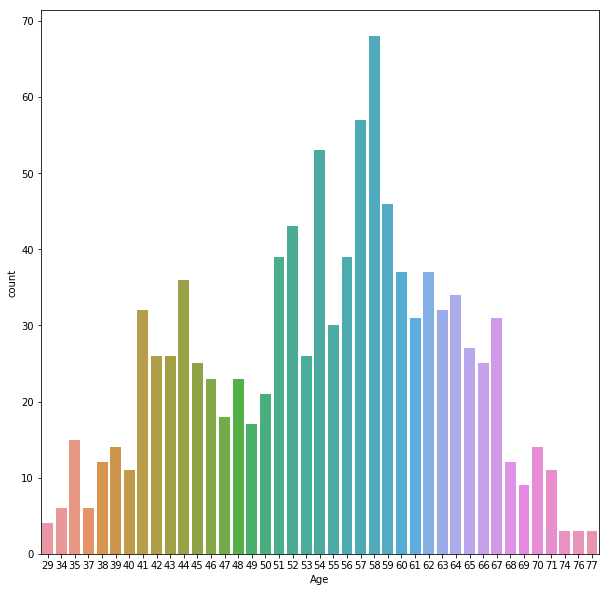

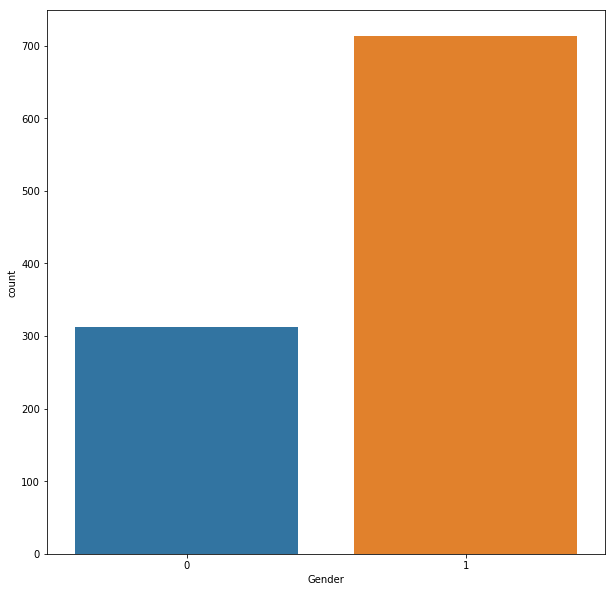

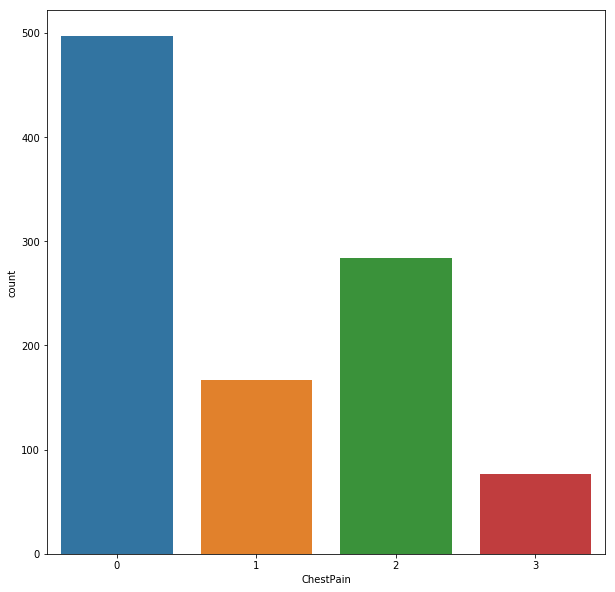

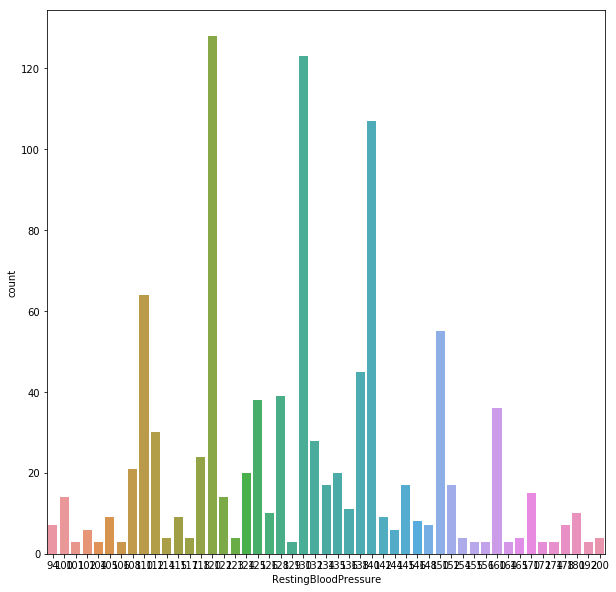

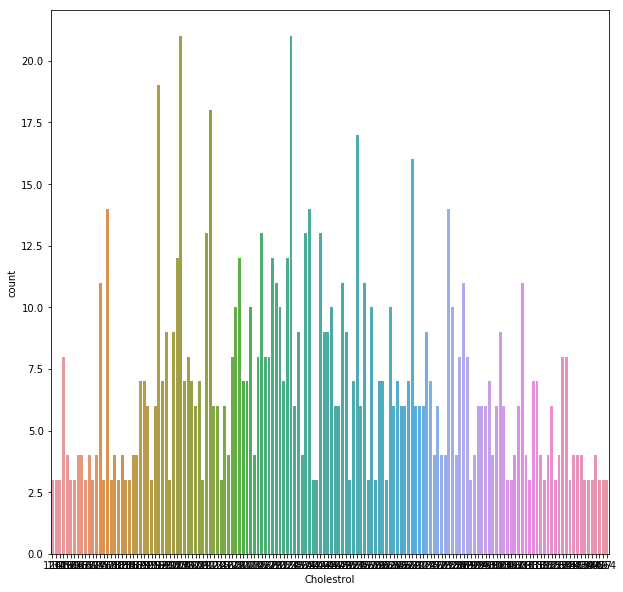

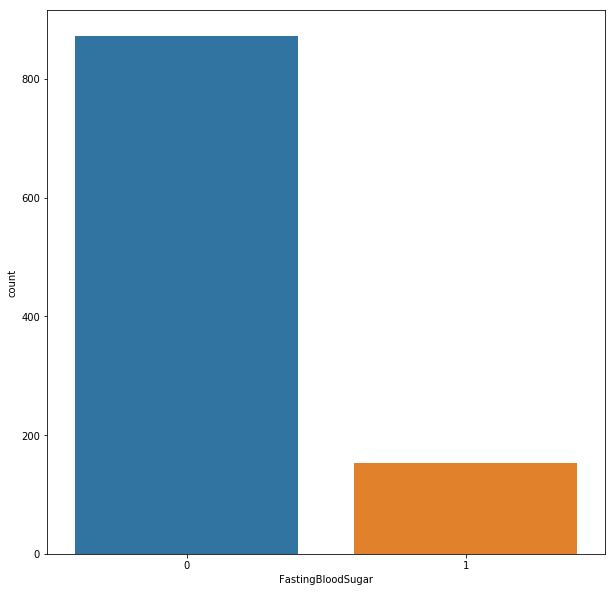

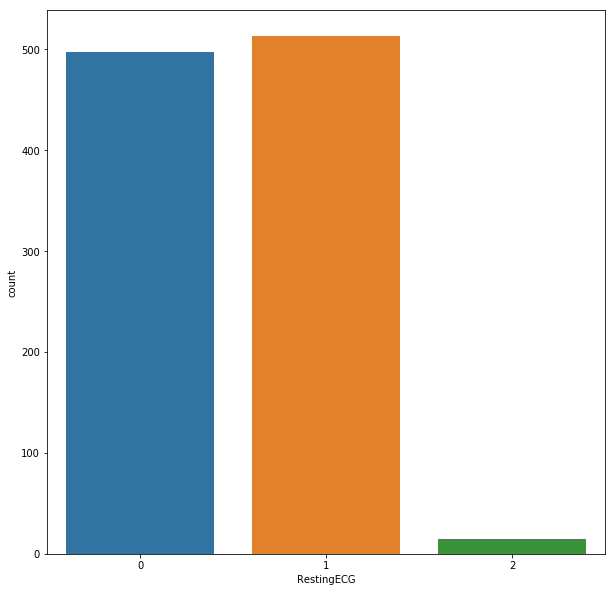

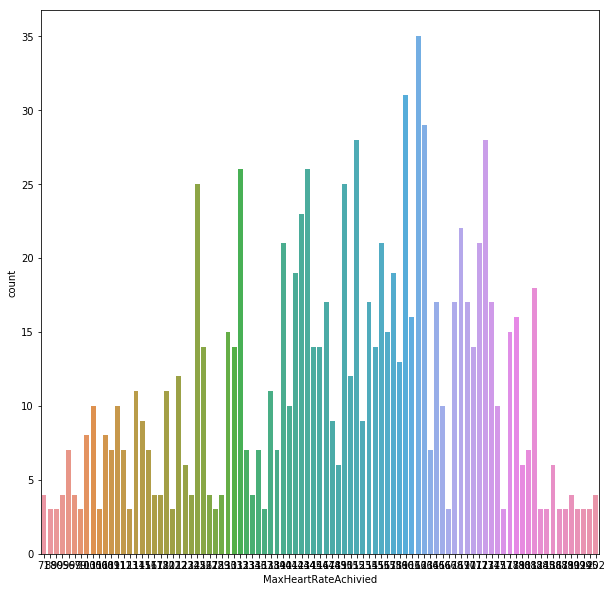

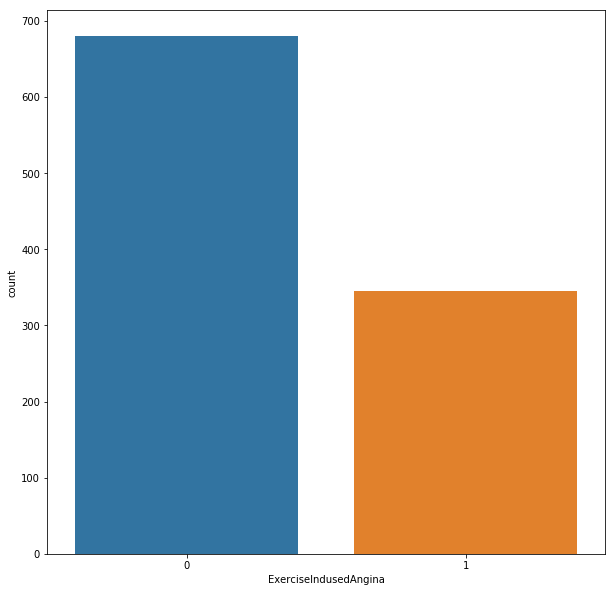

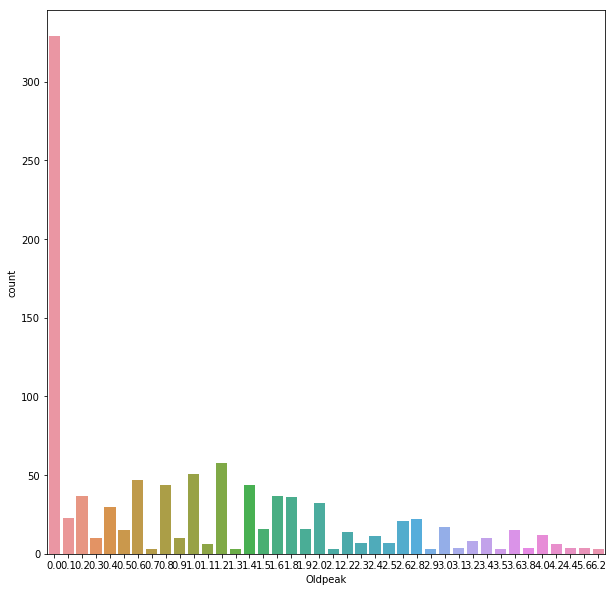

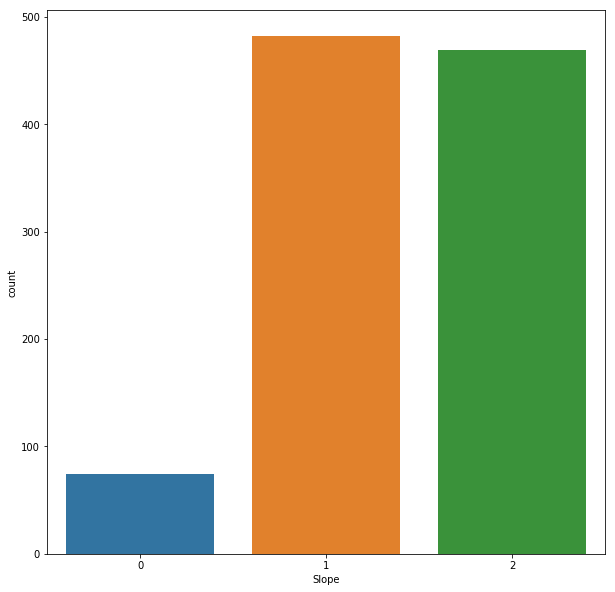

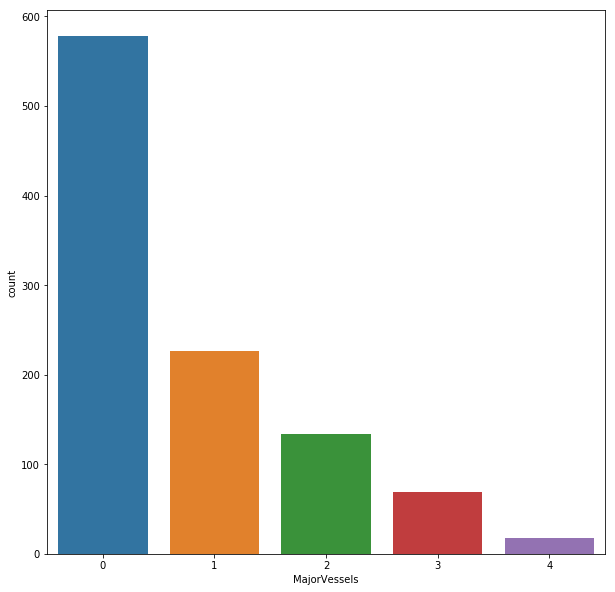

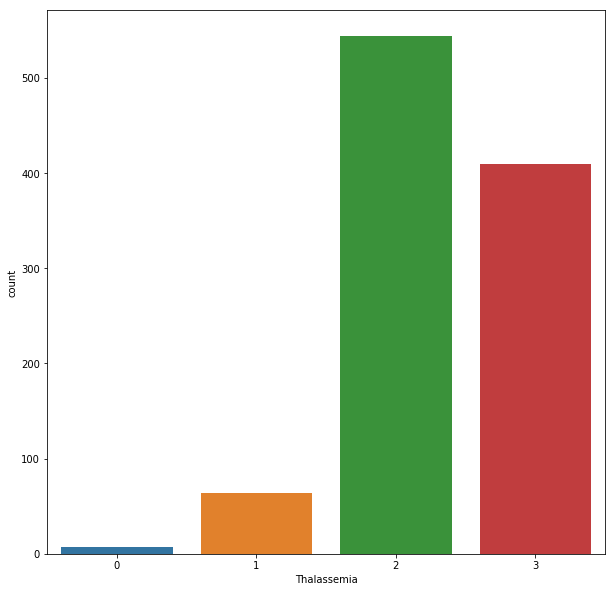

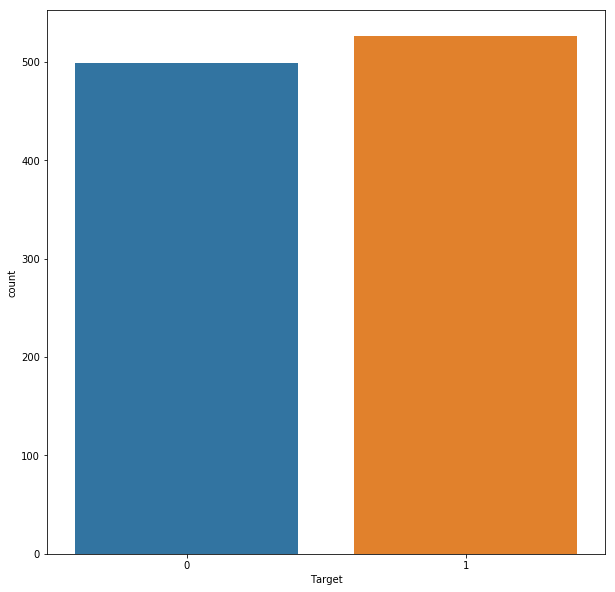

<Figure size 720x720 with 0 Axes>

In [2]:
# our goal is to try understand the data we got lets start 
# here we can see the info of each attribute  in the heart dataframe  as you can see it is not null 
#heart.info()
#we want to know in each coll or"attr" what are the distnguish value we have the counter of differ value 
#print(heart.nunique())
#''' as you  '''
#let us rename the colm we  have to be more understandable 
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

arr=[]
fig=plt.figure(figsize=(10, 10))

for i in heart:
    ax=sns.countplot(x=i,data=heart)
    fig=plt.figure(figsize=(10, 10))


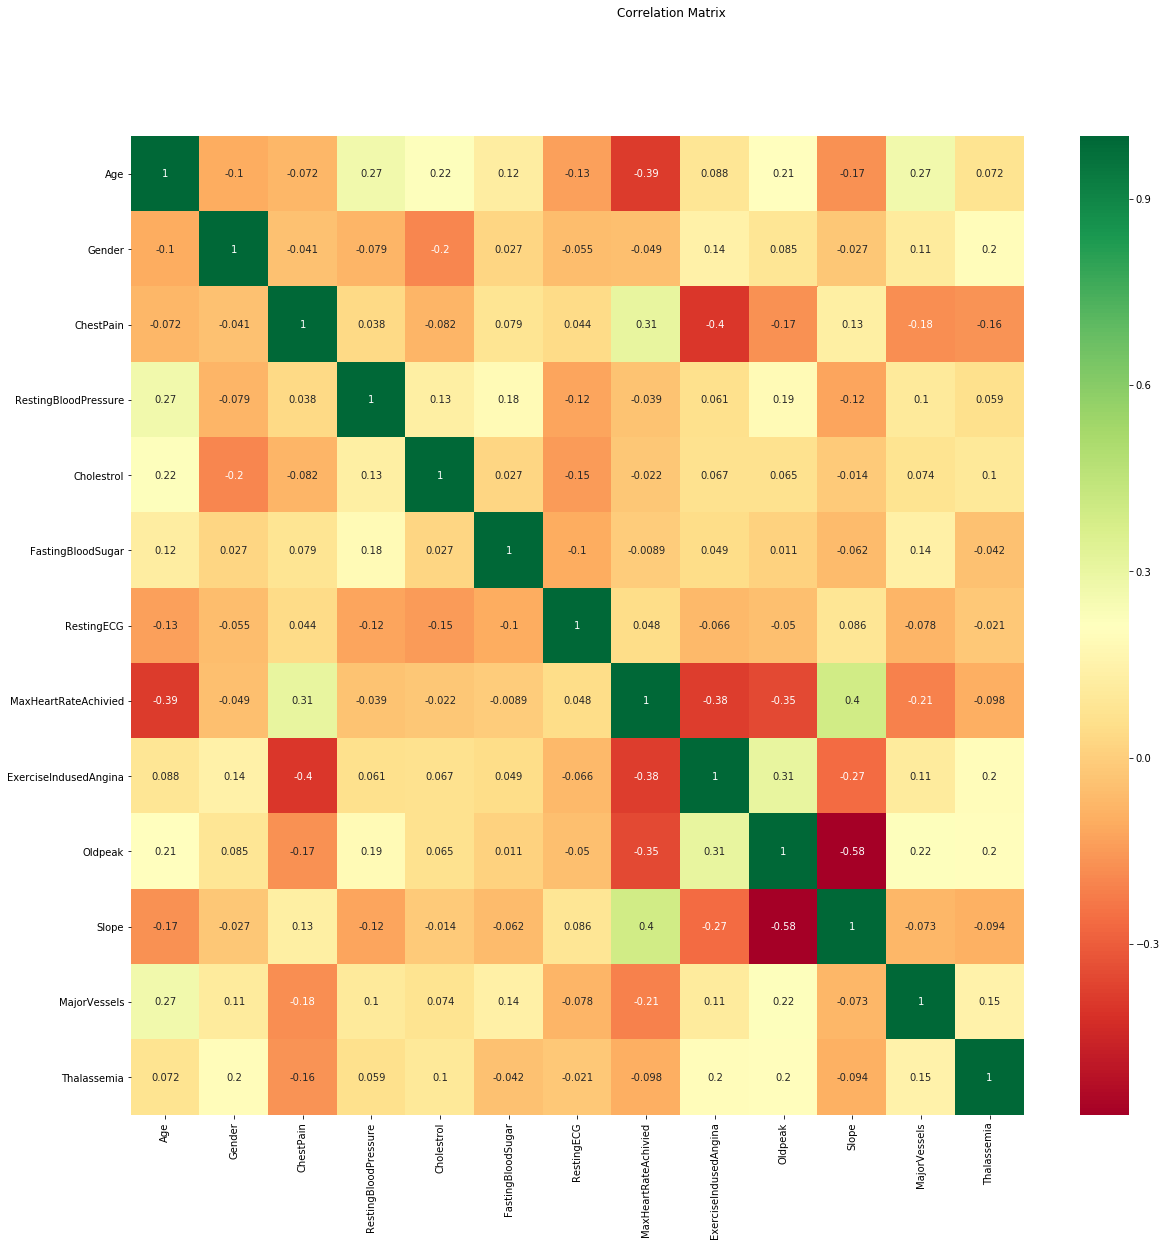

In [3]:

# this is the data plot of all the attrr counter of each value in attr 
import itertools
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/count')

# plt.show()
########################################

# this is the data plot of all the attrr counter of each value in attr 

# print("hssi")
# columns=heart.columns[:14]
# plt.subplots(figsize=(28,25))
# length=len(columns)
# for i,j in itertools.zip_longest(columns,range(length)):
#     plt.subplot((length/2),3,j+1)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
#     ax=sns.swarmplot(heart[i] )
# #     plt.plot(ax)
# #     heart[i].hist(bins=20,edgecolor='black')
#     plt.title(i)
# # plt.clf()

# plt.savefig('new_plot/ss')

# plt.show()

sns.heatmap(heart[heart.columns[:13]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.suptitle('Correlation Matrix')
plt.savefig('new_plot/correlationofdata')

score:  0.8246753246753247
Error of logstic:   0.17532467532467533


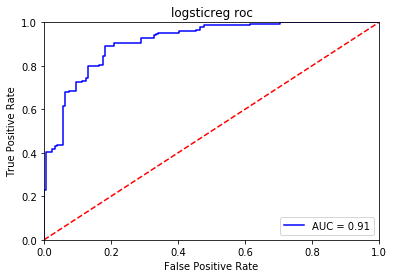

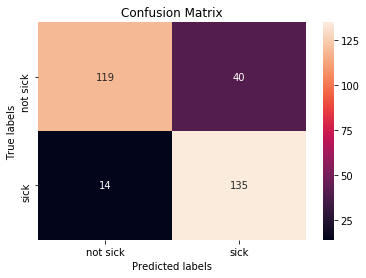


 clasification report:
    Accuracy  F1 score   Recall  Precision
1  0.824675  0.823904  0.90604   0.771429

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.89      0.75      0.82       159
        1.0       0.77      0.91      0.83       149

avg / total       0.84      0.82      0.82       308



In [79]:

#### lets know split the data we have in order to start the learning procsses 
heart.head()
X_data = heart.drop(columns=['Target'], axis=1)
Y = heart['Target']
#normalize the data
Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values
# we want here to seprate the data for the learning procsses testdata=30% train 70 %
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

# let know use two type of classfication algortimm i will first use logstic regression 
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
error_LR=1-score
print("score: ",score)
cmlogstic=confusion_matrix(y_test,pred)
# def result_score_of_model(model,ytest):    
def plot_heat(cm,title): 
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not sick', 'sick']); ax.yaxis.set_ticklabels(['not sick', 'sick']);
    plt.savefig('new_plot/'+title)
    plt.show()
    
print("Error of logstic:  ",error_LR)
def plot_roc(x_test,model,title):
    
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(x_test,logisticRegr,'logsticreg roc')
plot_heat(cmlogstic," logstic heatmap")
##
##############################################3
def get_report(y_test,pred):
    Report = [ (accuracy_score(y_test, pred),f1_score(y_test, pred, average='weighted')
                ,recall_score(y_test, pred), precision_score(y_test, pred))]
    dfObj = pd.DataFrame(Report, columns=['Accuracy', 'F1 score','Recall','Precision'], index=['1'])
    print('\n clasification report:\n', dfObj)   
    print ('\n clasification report for pair:\n', classification_report(y_test,pred))
get_report(y_test,pred)

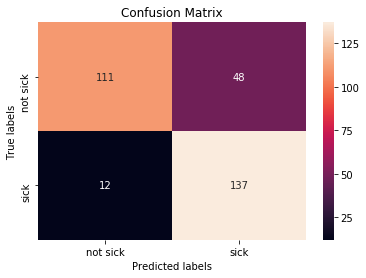

Accuracy for SVM kernel= rbf is 0.8051948051948052
report of  rbf

 clasification report:
    Accuracy  F1 score    Recall  Precision
1  0.805195  0.803259  0.919463   0.740541

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.90      0.70      0.79       159
        1.0       0.74      0.92      0.82       149

avg / total       0.82      0.81      0.80       308



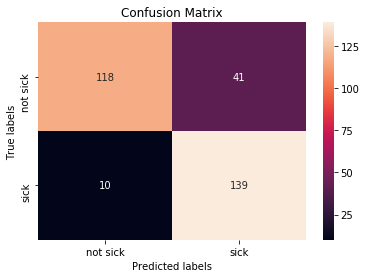

Accuracy for SVM kernel= linear is 0.8344155844155844
report of  linear

 clasification report:
    Accuracy  F1 score    Recall  Precision
1  0.834416  0.833274  0.932886   0.772222

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.92      0.74      0.82       159
        1.0       0.77      0.93      0.84       149

avg / total       0.85      0.83      0.83       308



In [80]:

# usin svm learning algotrim 
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
#     predsvm=mo.predict(x_test)
    svm_prediction=model.predict(x_test)
    cmsvm=confusion_matrix(y_test,svm_prediction)
    plot_heat(cmsvm,i+' svm')
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(svm_prediction,y_test))
    print("report of ",i)
    get_report(y_test,svm_prediction)

   C_parameter  Accuracy
2          0.3  0.831169
4          0.5  0.831169
5          0.6  0.831169
   C_parameter  Accuracy
0       0.0001  0.788961
 min is  [0.0001 0.788961038961039]


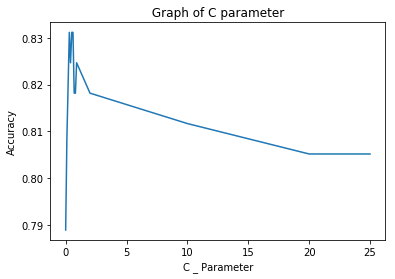

In [118]:

# know i want to play with the logstic regression paramter wwe will start with c 
# which is nverse of regularization strengt meaning we will force the theata value to be in spsfic range 
# let us start using the parmater we already have the train test above 
# C_param_range = [0.0001,0.001,0.01,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10,30,50,100,200]
# sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
# sepal_acc_table['C_parameter'] = C_param_range
# j=0
# for i in C_param_range:
#       # Apply logistic regression model to training data
#     lr = LogisticRegression( C = i,random_state = 0)
#     lr.fit(x_train,y_train)
    
#     # Predict using model
#     y_pred_sepal = lr.predict(x_test)
    
#     # Saving accuracy score in table
#     sepal_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_sepal)
#     j += 1
#     title="Roc of parm "+ str(i)
# #     plot_roc(x_test,lr,title)
#     print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^c is ",i," ^^^^^^^^^^^^^^^^^^^^^^^^^^^")
#     get_report(y_test,y_pred_sepal)
# print(sepal_acc_table)
# print(type(sepal_acc_table))



# maxem=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].max()]
# minm=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].min()]
# print(maxem)
# print(minm)
# know i want to play with the logstic regression paramter wwe will start with c 
# which is nverse of regularization strengt meaning we will force the theata value to be in spsfic range 
# let us start using the parmater we already have the train test above 
C_param_range = [0.0001,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,10,20,25]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range
j=0
for i in C_param_range:
      # Apply logistic regression model to training data
    lr = LogisticRegression( C = i,random_state = 0)
    lr.fit(x_train,y_train)
    
    # Predict using model
    y_pred_sepal = lr.predict(x_test)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_sepal)
    j += 1


x=sepal_acc_table['C_parameter']
y=sepal_acc_table['Accuracy']

plt.plot(x,y) 



# naming the x axis 
plt.xlabel('C _ Parameter') 

# naming the y axis 
plt.ylabel('Accuracy') 
# giving a title to my graph 
plt.title(' Graph of C parameter ')



maxem=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].max()]
minm=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].min()]
print(maxem)
print(minm)
min_value=np.asarray(minm)[0]
max_value=np.asarray(maxem)[0]
print(" min is ",min_value)

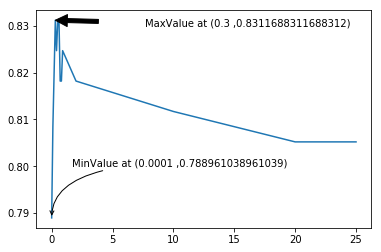

In [175]:
%matplotlib inline

fig, ax = plt.subplots()


ax.plot(x,y)

text1='MaxValue at ('+ str(max_value[0])+' ,'+ str(max_value[1])+')'
text2='MinValue at ('+ str(min_value[0])+' ,'+ str(min_value[1])+')'

ax.annotate(text1, xy=max_value, xytext=(7.7,0.83),
            arrowprops=dict(facecolor='black', shrink=0.5))
ax.annotate(text2, xy=min_value, xytext=(1.7,0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

0.3
0.8181818181818182


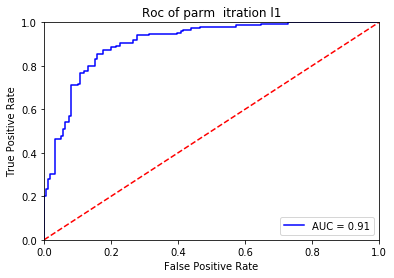

0.8311688311688312


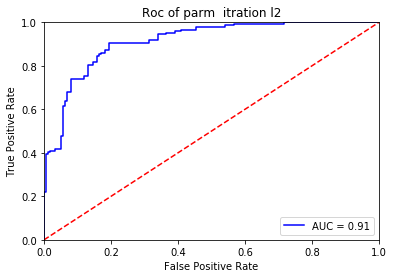

In [165]:
#צmoving to the next paramter  i want to test the next paramter lets check which paramter 
#know we want to change theloss function cost l1 vs l2  
# NOTE WE DID TAKE THE C THAT GIVED US BEST SCORE ABOVE 
'''The key difference between these techniques is that Lasso shrinks the less 
important feature’s coefficient to zero thus, removing some feature altogether.
So, this works well for feature selection in case we have a huge number of features.'''

cmax=np.asarray(maxem)[0][0]
print(cmax)
penalty=['l1', 'l2']
# l1  Lasso Regression  (Least Absolute Shrinkage and Selection Operator)
# l2 Ridge Regression. adds “squared magnitude” of coefficient as penalty term to the loss function
## we will do logstic regresion with difrrent using the max value of c we got   
for i in penalty:
      # Apply logistic regression model to training data
    lr = LogisticRegression( C=max_value[0],penalty = i,random_state = 0)
    lr.fit(x_train,y_train)
    
    # Predict using model
    y_pred_sepal = lr.predict(x_test)
    score = lr.score(x_test, y_test)
    print(score)
    # Saving accuracy score in table
#     sepal_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_sepal)
    j += 1
    title="Roc of parm  itration "+ str(i)
    plot_roc(x_test,lr,title)
#     print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^c is ",i," ^^^^^^^^^^^^^^^^^^^^^^^^^^^")
#     get_report(y_test,y_pred_sepal) 
